In [83]:
import numpy as np
import pandas as pd
import yfinance
from datetime import datetime, timedelta, date
import io

In [84]:
#read current s&p500 tickers to list form universe
sp500 = pd.read_csv("constituents.csv")
universe = sp500["Symbol"].tolist()

print(universe)

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'AAP', 'AMD', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'CHRW', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CERN', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', '

In [85]:
#scrape historical price data from yfinance
historical_prices = None

for ticker in universe:
    
    stock = yfinance.Ticker(ticker)
    close = stock.history(interval="1d",start="2018-01-01",end="2020-01-03")[['Close']]
    
    if close.shape[0] == 0: 
        continue

    close.rename(columns={'Close' : ticker}, inplace=True)

    if historical_prices is None:
        historical_prices = close
    else:
        historical_prices = historical_prices.merge(close, left_index = True, right_index = True, suffixes = ("",""))
    
print(historical_prices)

- BLL: No data found, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- CARR: Data doesn't exist for startDate = 1514736000, endDate = 1577980800
- CERN: No data found, symbol may be delisted
- DISCA: No data found, symbol may be delisted
- DISCK: No data found, symbol may be delisted
- FB: No data found, symbol may be delisted
- INFO: No data found, symbol may be delisted
- KSU: No data found, symbol may be delisted
- OGN: Data doesn't exist for startDate = 1514736000, endDate = 1577980800
- OTIS: Data doesn't exist for startDate = 1514736000, endDate = 1577980800
- PBCT: No data found, symbol may be delisted
- VIAC: No data found, symbol may be delisted
- WLTW: No data found, symbol may be delisted
- XLNX: No data found, symbol may be delisted
                   MMM        AOS        ABT       ABBV        ABMD  \
Date                                                                  
2019-05-24  14

In [86]:
#Portfolio uncorrelated stock (PLUS)
from random import seed
from random import random

class Pair:
    def __init__(self, key, value):
        self.key = key
        self.value = value

class StockSelector:
  def __init__(self, data_set, sentinel_stock):
    self.data_set = data_set
    self.sentinel_stock = sentinel_stock

  def get_stocks_greedy(self, k):

    top_k_stocks = self.data_set.corrwith(self.data_set[self.sentinel_stock]).abs().sort_values()
    
    top_k_stocks = top_k_stocks.head(100).keys()
    print(top_k_stocks.size)
    
    historical_prices_top_k_stocks = self.data_set.copy()
    count = 0
    count2 = 0
    print(historical_prices_top_k_stocks.shape)
    for ticker in historical_prices_top_k_stocks:
      if ticker in top_k_stocks:
        top_k_stocks.drop(ticker)
      else:
        historical_prices_top_k_stocks = historical_prices_top_k_stocks.drop(ticker, axis=1)

    corr_mat = historical_prices_top_k_stocks.corr()

    n = corr_mat.shape[0]
    seed(15)

    g = [[0 for i in range(n)] for j in range (n)]

    for i in range(corr_mat.shape[0]):
      for j in range(corr_mat.shape[1]):
        g[i][j] = abs(corr_mat.iloc[i,j])

    currSelected = [0 for i in range(k)]
    currValue = [0 for i in range(k)]

    isSelected = [0 for i in range(n)]
    vTotal = [Pair(i, 0) for i in range(n)]

    for i in range(n):
        for j in range(n):
          if g[i][j] <= 0.5:
            vTotal[i].value += 1

    vTotal = sorted(vTotal, key = lambda x: x.value)

    for i in range(k):
        keyToInsert = vTotal[i].key
        currSelected[i] = keyToInsert
        isSelected[keyToInsert] = 1

    for i in range(k):
        for j in range(k):
            if i != j: 
              currValue[j] += g[currSelected[i]][currSelected[j]]

    min = 50

    isChanged = True

    print(currSelected)
    print(currValue)

    while(isChanged):
        minReplacementValues = [-1 for i in range(k)]
        replacement = [-1 for i in range(k)]
        
        for i in range(k):
            currSelectedElement = currSelected[i]
            currMinVal = currValue[i]

            for j in range(n):
                if not isSelected[j]:
                    curr = 0
                    for l in range(k):
                        if i != l:
                            curr += g[currSelected[l]][j]
                    
                    if curr <= currMinVal:
                        currMinVal = curr
                        replacement[i] = j
            
            if replacement[i] != -1:
                minReplacementValues[i] = currMinVal

        toReplace = -1
        newReplacement = -1
        overallMinValue = n

        for i in range(k):
            if replacement[i] != -1:
                if minReplacementValues[i] <= overallMinValue:
                    overallMinValue = minReplacementValues[i]
                    toReplace = i
                    newReplacement = replacement[i]

        if toReplace != -1:
            isSelected[currSelected[toReplace]] = 0
            isSelected[newReplacement] = 1
            currSelected[toReplace] = newReplacement
            currValue[toReplace] = overallMinValue

        else:
            isChanged = False    

    realValue = [0 for i in range(k)]
    for i in range(k):
        for j in range(k):
            if i != j: 
              realValue[j] += g[currSelected[i]][currSelected[j]]
    print(realValue)
    # print(currSelected)
    # print(currValue)

    selectedStocks = []
    for stock in currSelected:
      selectedStocks.append(corr_mat.columns[stock])

    return selectedStocks

stockSelector = StockSelector(historical_prices, "AAPL")   
chosen_tickers = stockSelector.get_stocks_greedy(10)

chosen_tickers

100
(154, 489)
[38, 57, 82, 79, 95, 42, 68, 74, 55, 59]
[7.563206011997911, 7.807243183381809, 7.797447685570606, 7.849967436398918, 7.779364123308908, 7.133431618901765, 7.632968178659665, 7.314038286838118, 7.363796580374394, 7.149755313311584]
[1.7314762815769624, 1.6976987879756213, 1.8490193893966556, 1.3433958131290602, 1.9853504288677195, 1.8175277703218367, 1.356798596163933, 2.034632045408795, 2.027986584181015, 2.1423091005353556]


['BA', 'CCL', 'GPS', 'TMUS', 'DTE', 'AFL', 'CTLT', 'MDLZ', 'IT', 'AIG']

In [87]:
def Wilder(data, periods):
    start = np.where(~np.isnan(data))[0][0] #Check if nans present in beginning
    Wilder = np.array([np.nan]*len(data))
    Wilder[start+periods-1] = data[start:(start+periods)].mean() #Simple Moving Average
    for i in range(start+periods,len(data)):
        Wilder[i] = (Wilder[i-1]*(periods-1) + data[i])/periods #Wilder Smoothing
    return(Wilder)

In [88]:
def prep_df_for_stock(ticker):
  stock = yfinance.Ticker(ticker)
  df = stock.history(interval="1d",start="2018-01-01",end="2020-01-03")

  df.drop(['Dividends', 'Stock Splits'], inplace=True, axis=1)
  df['return'] = df['Close'].pct_change() 
  df['SMA_5'] = df['Close'].transform(lambda x: x.rolling(window = 5).mean())
  df['SMA_15'] = df['Close'].transform(lambda x: x.rolling(window = 15).mean())

  df['5Ewm'] = df['Close'].transform(lambda x: x.ewm(span=5, adjust=False).mean())
  df['15Ewm'] = df['Close'].transform(lambda x: x.ewm(span=15, adjust=False).mean())
  df['MACD'] = df['15Ewm'] - df['5Ewm']

  df['prev_close'] = df['Close'].shift(1)
  df['TR'] = np.maximum((df['High'] - df['Low']), 
                      np.maximum(abs(df['High'] - df['prev_close']), 
                      abs(df['prev_close'] - df['Low'])))


  TR_data = df.copy()
  df['ATR_5'] = Wilder(TR_data['TR'], 5)
  df['ATR_15'] = Wilder(TR_data['TR'], 15)

  df['ATR_Ratio'] = df['ATR_5'] / df['ATR_15']
  df['prev_high'] = df['High'].shift(1)
  df['prev_low'] = df['Low'].shift(1)

  df['+DM'] = np.where(~np.isnan(df.prev_high),
                            np.where((df['High'] > df['prev_high']) & 
          (((df['High'] - df['prev_high']) > (df['prev_low'] - df['Low']))), 
                                                                    df['High'] - df['prev_high'], 
                                                                    0),np.nan)

  df['-DM'] = np.where(~np.isnan(df.prev_low),
                            np.where((df['prev_low'] > df['Low']) & 
          (((df['prev_low'] - df['Low']) > (df['High'] - df['prev_high']))), 
                                      df['prev_low'] - df['Low'], 
                                      0),np.nan)

  ADX_data = df.copy()
  df['+DM_5'] = Wilder(ADX_data['+DM'], 5)
  df['-DM_5'] = Wilder(ADX_data['-DM'], 5)
  df['+DM_15'] = Wilder(ADX_data['+DM'], 15)
  df['-DM_15'] = Wilder(ADX_data['-DM'], 15)

  df['+DI_5'] = (df['+DM_5']/df['ATR_5'])*100
  df['-DI_5'] = (df['-DM_5']/df['ATR_5'])*100
  df['+DI_15'] = (df['+DM_15']/df['ATR_15'])*100
  df['-DI_15'] = (df['-DM_15']/df['ATR_15'])*100

  df['DX_5'] = (np.round(abs(df['+DI_5'] - df['-DI_5'])/(df['+DI_5'] + df['-DI_5']) * 100))

  df['DX_15'] = (np.round(abs(df['+DI_15'] - df['-DI_15'])/(df['+DI_15'] + df['-DI_15']) * 100))


  ADX_data = df.copy()
  df['ADX_5'] = Wilder(ADX_data['DX_5'], 5)
  df['ADX_15'] = Wilder(ADX_data['DX_15'], 15)

  df["Diff"] = df["Close"].diff(periods=30)
  df["y"] = df["Diff"].apply(lambda x: 1 if x > 0 else -1).shift(-1)

  df = df.dropna()

  y_df = df["y"]
  y_df.drop(y_df.tail(1).index, inplace= True)


  df.drop("y", inplace=True, axis=1)

  input_vector = df.tail(1)
  df.drop(df.tail(1).index, inplace= True)
  x_df = df

  return (x_df, y_df,input_vector)

In [89]:
x_df, y_df, input_vector = prep_df_for_stock("AAPL")

input_vector

,Open,High,Low,Close,Volume,return,SMA_5,SMA_15,5Ewm,15Ewm,...,-DM_15,+DI_5,-DI_5,+DI_15,-DI_15,DX_5,DX_15,ADX_5,ADX_15,Diff
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,71.127275,72.047246,71.02669,72.039886,100805600,0.007307,71.102739,68.99343,71.115002,69.268725,...,0.132241,36.343704,10.725559,37.190355,12.326704,54.0,50.0,67.163738,38.663531,6.84214


In [90]:
import sklearn
import sklearn.metrics as metrics
import sklearn.utils as utils
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier

In [91]:
def print_accuracy(y_test, y_pred):
    print("Accuracy:")
    test_acc_linear_score = metrics.accuracy_score(y_test, y_pred)
    print(test_acc_linear_score)
    print("Classification report:")
    print(metrics.classification_report(y_test, y_pred))

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state=1)

In [93]:
def prep_training_df(x_df, y_df):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state=1)
  #standardizing variables
  stdScaler = StandardScaler()
  x_train = stdScaler.fit_transform(x_train)
  x_test = stdScaler.transform(x_test)
  return x_train, x_test, y_train, y_test

In [94]:
from sklearn.linear_model import LogisticRegression
def train_lr(x_train, x_test, y_train, y_test):
  lr = LogisticRegression(multi_class='multinomial', max_iter=1000)

  lr.fit(x_train, y_train)
  y_pred_lr = lr.predict(x_test)
  print_accuracy(y_test, y_pred_lr)
  return lr


In [95]:
from sklearn.svm import SVC
def train_svm_linear(x_train, x_test, y_train, y_test):
  svm_linear = SVC(kernel="linear", C=70)
  svm_linear.fit(x_train,y_train)
  y_pred_svm_linear = svm_linear.predict(x_test)
  print_accuracy(y_test, y_pred_svm_linear)
  return svm_linear



In [96]:
def train_svm_radial(x_train, x_test, y_train, y_test):
  svm_radial = SVC(kernel = "rbf", gamma=2, C=0.5)
  svm_radial.fit(x_train, y_train)
  y_pred_svm_radial = svm_radial.predict(x_test)
  print_accuracy(y_test, y_pred_svm_radial)
  return svm_radial


In [97]:
def train_svm_poly(x_train, x_test, y_train, y_test):
  svm_poly = SVC(kernel="poly")
  svm_poly.fit(x_train,y_train)
  y_pred_svm_poly = svm_poly.predict(x_test)
  print_accuracy(y_test, y_pred_svm_poly)
  return svm_poly

In [98]:
from sklearn.ensemble import RandomForestClassifier
def train_rf(x_train, x_test, y_train, y_test):
  rf = RandomForestClassifier(max_depth=5, n_estimators=10)
  rf.fit(x_train,y_train)
  y_pred_rf = rf.predict(x_test)
  print_accuracy(y_test, y_pred_rf)
  return rf

In [99]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
def train_ada(x_train, x_test, y_train, y_test):
  ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "entropy", max_depth = 4), n_estimators = 700, learning_rate = 0.2)
  ada.fit(x_train,y_train)
  y_pred_ada = ada.predict(x_test)
  print_accuracy(y_test, y_pred_ada)
  return ada

In [100]:
#PLUS chosen 10 stocks historical data
# tickers = ['ANET', 'SJM', 'EQR', 'COO', 'CTXS', 'CAH', 'BIIB', 'WFC', 'LVS', 'CINF']

# days back 
time_horizon = 90

#num of stocks
num_stocks = 10

# universe of tickers to consider
tickers = universe
historical_prices = None

today = datetime.today()
target = today - timedelta(days=time_horizon)

chosen_historical_prices = None

today = datetime.today()
target = today - timedelta(days=time_horizon)


for ticker in chosen_tickers:
  stock = yfinance.Ticker(ticker)
  close = stock.history(interval="1d",start="2018-01-01",end="2020-01-03")[['Close']]

  if close.shape[0] == 0: 
    continue

  close.rename(columns={'Close' : ticker}, inplace=True)
    
  if chosen_historical_prices is None:
    chosen_historical_prices = close
  else:
    chosen_historical_prices = chosen_historical_prices.merge(close, left_index = True, right_index = True, suffixes = ("",""))

chosen_historical_prices

,BA,CCL,GPS,TMUS,DTE,AFL,CTLT,MDLZ,IT,AIG
Date,,,,,,,,,,
2018-01-02,282.886383,61.440411,29.555386,64.040001,79.599724,39.194500,42.040001,38.412056,124.849998,52.261723
2018-01-03,283.801270,61.578480,28.944555,63.610001,79.342842,39.310341,42.349998,38.566029,125.190002,52.841423
2018-01-04,282.724396,61.532444,28.569332,63.000000,78.021690,39.715782,41.779999,38.656601,127.300003,53.052238
2018-01-05,294.322327,61.026207,28.403536,64.599998,77.948303,39.978649,41.660000,39.154751,129.339996,53.271820
2018-01-08,295.570709,60.796085,28.185381,65.099998,78.520767,40.081127,41.500000,38.955494,130.309998,52.920475
...,...,...,...,...,...,...,...,...,...,...
2019-12-26,327.968689,50.737823,16.800596,77.400002,100.592339,48.980381,56.220001,51.627098,154.029999,46.814648
2019-12-27,328.187408,50.737823,16.706892,77.239998,100.850578,48.980381,56.450001,52.031841,153.820007,47.230831
2019-12-30,324.469513,50.431400,16.697523,78.080002,100.960114,49.092079,56.639999,52.036568,152.770004,47.166080


In [101]:
#test accuracy of different ML models in predction of expected return
last_day = date(2018, 1, 1)
mu = pd.Series([])
def get_expected_returns(stocks, chosen_historical_prices, input_vector, predictor, mu, last_day):
  for ticker in stocks:
    # x_df, y_df = prep_df_for_stock(ticker)
    x_df, y_df, input_vector = prep_df_for_stock(ticker)
    x_train, x_test, y_train, y_test = prep_training_df(x_df, y_df)
    model = predictor(x_train, x_test, y_train, y_test)
    std = np.log(chosen_historical_prices[ticker]/chosen_historical_prices[ticker].shift()).std()*252**.5
    # mu = mu.append(pd.Series([model.predict(input_vector)[0] * chosen_historical_prices[ticker].tail(365).pct_change().std()], index=[ticker]))
    mu = mu.append(pd.Series([model.predict(input_vector)[0] * std], index=[ticker]))
    # mu = mu.append({ "stock" : ticker, "ex_returns" : model.predict(input_vector)[0]}, ignore_index=True)
    # mu["stock"].add(ticker)
    # mu["ex_returns"].add(model.predict(input_vector)[0])
    last_day = max(last_day, input_vector.index[0])
  return mu, last_day

mu, last_day = get_expected_returns(chosen_tickers, chosen_historical_prices, input_vector, train_rf, mu, last_day)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9156\2585692874.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  mu = pd.Series([])
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_9156\2585692874.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  last_day = max(last_day, input_vector.index[0])


Accuracy:
0.8813559322033898
Classification report:
              precision    recall  f1-score   support

        -1.0       0.88      0.88      0.88        58
         1.0       0.88      0.88      0.88        60

    accuracy                           0.88       118
   macro avg       0.88      0.88      0.88       118
weighted avg       0.88      0.88      0.88       118

Accuracy:
0.8983050847457628
Classification report:
              precision    recall  f1-score   support

        -1.0       0.91      0.93      0.92        73
         1.0       0.88      0.84      0.86        45

    accuracy                           0.90       118
   macro avg       0.90      0.89      0.89       118
weighted avg       0.90      0.90      0.90       118



c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy:
0.864406779661017
Classification report:
              precision    recall  f1-score   support

        -1.0       0.88      0.90      0.89        71
         1.0       0.84      0.81      0.83        47

    accuracy                           0.86       118
   macro avg       0.86      0.85      0.86       118
weighted avg       0.86      0.86      0.86       118

Accuracy:
0.8389830508474576
Classification report:
              precision    recall  f1-score   support

        -1.0       0.74      0.83      0.79        42
         1.0       0.90      0.84      0.87        76

    accuracy                           0.84       118
   macro avg       0.82      0.84      0.83       118
weighted avg       0.85      0.84      0.84       118



c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy:
0.9152542372881356
Classification report:
              precision    recall  f1-score   support

        -1.0       0.89      0.89      0.89        44
         1.0       0.93      0.93      0.93        74

    accuracy                           0.92       118
   macro avg       0.91      0.91      0.91       118
weighted avg       0.92      0.92      0.92       118

Accuracy:
0.8559322033898306
Classification report:
              precision    recall  f1-score   support

        -1.0       0.88      0.62      0.73        37
         1.0       0.85      0.96      0.90        81

    accuracy                           0.86       118
   macro avg       0.87      0.79      0.82       118
weighted avg       0.86      0.86      0.85       118



c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy:
0.8559322033898306
Classification report:
              precision    recall  f1-score   support

        -1.0       0.83      0.88      0.85        56
         1.0       0.88      0.84      0.86        62

    accuracy                           0.86       118
   macro avg       0.86      0.86      0.86       118
weighted avg       0.86      0.86      0.86       118

Accuracy:
0.9322033898305084
Classification report:
              precision    recall  f1-score   support

        -1.0       0.95      0.87      0.91        46
         1.0       0.92      0.97      0.95        72

    accuracy                           0.93       118
   macro avg       0.94      0.92      0.93       118
weighted avg       0.93      0.93      0.93       118



c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy:
0.9322033898305084
Classification report:
              precision    recall  f1-score   support

        -1.0       0.87      0.95      0.91        43
         1.0       0.97      0.92      0.95        75

    accuracy                           0.93       118
   macro avg       0.92      0.94      0.93       118
weighted avg       0.94      0.93      0.93       118

Accuracy:
0.8813559322033898
Classification report:
              precision    recall  f1-score   support

        -1.0       0.86      0.92      0.89        60
         1.0       0.91      0.84      0.88        58

    accuracy                           0.88       118
   macro avg       0.88      0.88      0.88       118
weighted avg       0.88      0.88      0.88       118



c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [102]:
last_day = last_day.strftime("%Y-%m-%d")


In [103]:
mu

BA     -0.302388
CCL     0.269864
GPS    -0.392125
TMUS    0.229250
DTE     0.154764
AFL     0.177944
CTLT    0.304833
MDLZ    0.172613
IT     -0.262286
AIG    -0.236454
dtype: float64

In [104]:
last_day

'2019-12-31'

In [105]:
#PyportfolioOpt (Mean Variance Analysis Optimization)

from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import objective_functions

df = chosen_historical_prices

mu = mu.squeeze(axis=0)
S = CovarianceShrinkage(df).ledoit_wolf()

ef = EfficientFrontier(mu, S, weight_bounds = (0,1))
ef.add_objective(objective_functions.L2_reg, gamma=0.1)
weights = ef.max_sharpe()
ef.portfolio_performance(verbose=True)
cleaned_weights = ef.clean_weights()

print(cleaned_weights)

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:257: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Expected annual return: 22.6%
Annual volatility: 14.0%
Sharpe Ratio: 1.47
OrderedDict([('BA', 0.0), ('CCL', 0.20014), ('GPS', 0.0), ('TMUS', 0.17034), ('DTE', 0.16729), ('AFL', 0.13389), ('CTLT', 0.19731), ('MDLZ', 0.13102), ('IT', 0.0), ('AIG', 0.0)])


In [106]:
#backtesting
# start="2020-11-01",end="2021-02-01")
# start="2020-11-01",end="2021-11-01")
test_prices = None

today = datetime.today()
target = today - timedelta(days=time_horizon)


for ticker in chosen_tickers:
  stock = yfinance.Ticker(ticker)
  close = stock.history(interval="1d",start="2020-11-01",end="2021-11-01")[['Close']]

  if close.shape[0] == 0: 
    continue

  close.rename(columns={'Close' : ticker}, inplace=True)
    
  if test_prices is None:
    test_prices = close
  else:
    test_prices = test_prices.merge(close, left_index = True, right_index = True, suffixes = ("",""))

test_prices

,BA,CCL,GPS,TMUS,DTE,AFL,CTLT,MDLZ,IT,AIG
Date,,,,,,,,,,
2020-11-02,148.600006,13.550000,19.780874,110.389999,101.314445,33.761749,88.529999,52.304943,125.019997,31.043579
2020-11-03,153.649994,13.710000,19.894833,111.120003,101.927017,34.446110,95.510002,52.381950,140.800003,31.464506
2020-11-04,151.630005,13.340000,19.875839,116.019997,100.887276,34.721752,101.510002,52.882469,142.259995,30.220854
2020-11-05,157.089996,14.180000,20.227201,117.260002,100.855026,35.358589,102.480003,53.556259,146.250000,31.981110
2020-11-06,157.740005,13.820000,20.350657,123.559998,99.831406,35.073441,103.309998,53.748772,147.979996,31.722801
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,212.869995,22.049999,21.736193,115.930000,113.157974,55.540298,130.889999,59.350182,323.190002,58.604061
2021-10-26,209.809998,21.820000,21.929317,116.360001,113.862457,55.696259,133.509995,59.832146,326.420013,58.201183
2021-10-27,206.610001,21.639999,21.011974,116.620003,111.367401,54.585056,133.020004,59.399361,320.880005,57.532993


In [107]:
pct_chg = test_prices.pct_change()
pct_chg

,BA,CCL,GPS,TMUS,DTE,AFL,CTLT,MDLZ,IT,AIG
Date,,,,,,,,,,
2020-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-03,0.033984,0.011808,0.005761,0.006613,0.006046,0.020270,0.078843,0.001472,0.126220,0.013559
2020-11-04,-0.013147,-0.026988,-0.000955,0.044096,-0.010201,0.008002,0.062821,0.009555,0.010369,-0.039526
2020-11-05,0.036009,0.062969,0.017678,0.010688,-0.000320,0.018341,0.009556,0.012741,0.028047,0.058246
2020-11-06,0.004138,-0.025388,0.006103,0.053727,-0.010149,-0.008064,0.008099,0.003595,0.011829,-0.008077
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,-0.000470,-0.010767,-0.000444,-0.008043,-0.003017,0.007782,-0.013863,-0.002974,-0.004068,-0.006166
2021-10-26,-0.014375,-0.010431,0.008885,0.003709,0.006226,0.002808,0.020017,0.008121,0.009994,-0.006875
2021-10-27,-0.015252,-0.008249,-0.041832,0.002234,-0.021913,-0.019951,-0.003670,-0.007233,-0.016972,-0.011481


In [108]:
pf_val = pd.DataFrame(index = pct_chg.index, columns = {'historical_mean': [], 'RF_prediction': [], 'price_chng2': []})
pf_val = pf_val.fillna(float(0))

In [109]:
stock = yfinance.Ticker("^GSPC")
close = stock.history(interval="1d",start="2020-11-01",end="2021-11-01")[['Close']]


close.rename(columns={'Close' : "S&P"}, inplace=True)
close = close.pct_change()
close["S&P"][0] = 1
# init = 1
for i in range(1, close["S&P"].size):
  close["S&P"][i] = (close["S&P"][i-1]) * (1 + close["S&P"][i])
  


pf_val = pd.merge(pf_val, close, left_index=True, right_index=True)
# pf_val = pf_val.merge(close, left_index = True, right_index = True, suffixes = ("",""))
pf_val

,historical_mean,RF_prediction,price_chng2,S&P
Date,,,,
2020-11-02,0.0,0.0,0.0,1.000000
2020-11-03,0.0,0.0,0.0,1.017799
2020-11-04,0.0,0.0,0.0,1.040239
2020-11-05,0.0,0.0,0.0,1.060482
2020-11-06,0.0,0.0,0.0,1.060177
...,...,...,...,...
2021-10-25,0.0,0.0,0.0,1.379501
2021-10-26,0.0,0.0,0.0,1.382012
2021-10-27,0.0,0.0,0.0,1.375030


In [110]:
import math
sum = 0

for ticker in pct_chg:
  init = cleaned_weights[ticker]
  i = 0
  for val in pct_chg[ticker]:
    if not math.isnan(val):
      init *= (1 + val)
      init *= 1.001
      pf_val['RF_prediction'][i] += init

    i = i + 1  
  sum += init
  
pf_val['RF_prediction'][0] = 1

sum

1.7361881208094736

In [111]:
mu1 = expected_returns.mean_historical_return(chosen_historical_prices)
ef1 = EfficientFrontier(mu1, S, weight_bounds = (0,1))
weights = ef1.max_sharpe()
ef1.portfolio_performance(verbose=True)
weights = ef1.clean_weights()
print(weights)

Expected annual return: 13.8%
Annual volatility: 12.4%
Sharpe Ratio: 0.95
OrderedDict([('BA', 0.0), ('CCL', 0.0), ('GPS', 0.0), ('TMUS', 0.02919), ('DTE', 0.35091), ('AFL', 0.18181), ('CTLT', 0.08942), ('MDLZ', 0.32304), ('IT', 0.02561), ('AIG', 0.0)])


In [112]:
sum = 0
  
pf_val['historical_mean'][0] = 1

for ticker in pct_chg:
  init = weights[ticker]
  j = 0
  for val in pct_chg[ticker]:
    if not math.isnan(val):
      init *= 1 + val 
      init *= 1.001
      pf_val['historical_mean'][j] += init
    j = j + 1
  sum += init
 

pf_val['historical_mean'][0] = 1

sum

1.6337017040330193

In [113]:
mu2 = expected_returns.capm_return(chosen_historical_prices)
ef2 = EfficientFrontier(mu2, S, weight_bounds = (0,1))
weights = ef2.max_sharpe()
ef2.portfolio_performance(verbose=True)
weights = ef2.clean_weights()
print(weights)

Expected annual return: 6.4%
Annual volatility: 14.0%
Sharpe Ratio: 0.31
OrderedDict([('BA', 0.1023), ('CCL', 0.10021), ('GPS', 0.10155), ('TMUS', 0.10095), ('DTE', 0.0907), ('AFL', 0.09844), ('CTLT', 0.1029), ('MDLZ', 0.09921), ('IT', 0.10213), ('AIG', 0.10161)])


In [114]:
sum = 0
for ticker in pct_chg:
  k = 0
  init = weights[ticker]
  for val in pct_chg[ticker]:
    if not math.isnan(val):
      init *= 1 + val
      # init *= 1.003
      pf_val['price_chng2'][k] += init
    k = k + 1
  sum += init
  

pf_val['price_chng2'][0] = 1

sum

1.5106526068484012

In [115]:
pf_val

,historical_mean,RF_prediction,price_chng2,S&P
Date,,,,
2020-11-02,1.000000,1.000000,1.000000,1.000000
2020-11-03,1.017755,1.023978,1.030984,1.017799
2020-11-04,1.027420,1.041132,1.036159,1.040239
2020-11-05,1.038080,1.062878,1.062322,1.060482
2020-11-06,1.038080,1.067872,1.066652,1.060177
...,...,...,...,...
2021-10-25,1.645278,1.728947,1.511010,1.379501
2021-10-26,1.659312,1.738478,1.514952,1.382012
2021-10-27,1.636806,1.723610,1.493369,1.375030


<AxesSubplot:xlabel='Date'>

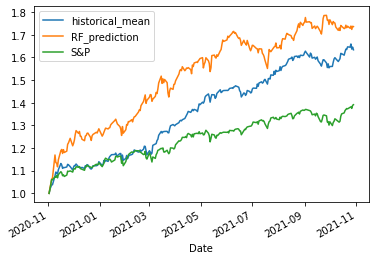

In [116]:

pf_val.plot(y = ['historical_mean', 'RF_prediction', "S&P"] , )